# Data Maninpulation

In [ ]:
import pandas as pd

df_airports = pd.read_csv('/content/drive/MyDrive/dsc502/airports1.csv')

# remove rows with missing values
df_airports.dropna(inplace=True) 

df_airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
import folium
# initialize the map and store it in a m object
map = folium.Map(location=[48, -115], zoom_start=4)

for index, row in df_airports.iterrows():
  loc = [row['LATITUDE'], row['LONGITUDE']]
  c = folium.Circle(radius=20, location=loc, color='red', fill=True)
  c.add_to(map)

# show the map
map

In [ ]:
#raw data
df_flights = pd.read_csv('/content/drive/MyDrive/dsc502/flights-abr.csv')
df_flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,10,2,EV,RDU,EWR,1013,1005.0,-8.0,96.0,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,3,10,2,UA,LGA,IAH,1013,1005.0,-8.0,264.0,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,3,10,2,UA,SAN,ORD,1013,1010.0,-3.0,251.0,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,3,10,2,EV,MSY,ORD,1013,1003.0,-10.0,149.0,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cleaning raw data, taking columns MONTH and DAY and covert into a date type 
df_date = df_flights.loc[:,'MONTH':'DAY']
df_date['YEAR'] = 2015
df_date['MONTH'] = df_date['MONTH'].apply(lambda x: '{0:0>2}'.format(x))
df_date['DAY'] = df_date['DAY'].apply(lambda x: '{0:0>2}'.format(x))
df_date = df_date.applymap(str)
df_date['DATE_S'] = df_date['DAY']+ df_date['MONTH'] + df_date['YEAR']
df_date['DATE'] = pd.to_datetime(df_date['DATE_S'], format='%d%m%Y')
df_date

,MONTH,DAY,YEAR,DATE_S,DATE
0,01,01,2015,01012015,2015-01-01
1,01,01,2015,01012015,2015-01-01
2,01,01,2015,01012015,2015-01-01
3,01,01,2015,01012015,2015-01-01
4,01,01,2015,01012015,2015-01-01
...,...,...,...,...,...
1048570,03,10,2015,10032015,2015-03-10
1048571,03,10,2015,10032015,2015-03-10
1048572,03,10,2015,10032015,2015-03-10
1048573,03,10,2015,10032015,2015-03-10


In [ ]:
#Date part of dataframe that with be merged with other dataframes
df_date2 = df_date.loc[:,'DATE']
df_date2

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
1048570   2015-03-10
1048571   2015-03-10
1048572   2015-03-10
1048573   2015-03-10
1048574   2015-03-10
Name: DATE, Length: 1048575, dtype: datetime64[ns]

In [ ]:
#convert hours as int to HHMM format
import numpy as np
from datetime import datetime

df_times = df_flights[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']]
df_times = df_times.fillna(0)
df_times = df_times.applymap(int)
df_times['SCHEDULED_DEPARTURE'] = df_times['SCHEDULED_DEPARTURE'].apply(lambda x: '{0:0>4}'.format(x))
df_times['DEPARTURE_TIME'] = df_times['DEPARTURE_TIME'].apply(lambda x: '{0:0>4}'.format(x))
df_times['SCHEDULED_ARRIVAL'] = df_times['SCHEDULED_ARRIVAL'].apply(lambda x: '{0:0>4}'.format(x))
df_times['ARRIVAL_TIME'] = df_times['ARRIVAL_TIME'].apply(lambda x: '{0:0>4}'.format(x))
df_times = df_times.applymap(str)
# df_times['time_datetime'] = df_times.apply(lambda x: datetime.strptime(x,'%H%M'))
# df_times

In [ ]:
#converting NaN to zeros for delay times
import numpy as np

df_delays = df_flights.loc[:,'AIR_SYSTEM_DELAY':'WEATHER_DELAY']
df_delays = df_delays.fillna(0)
df_delays['TOTAL_DELAY'] = df_delays.sum(axis=1)
df_delays = df_delays.astype('int')
df_delays

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TOTAL_DELAY
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1048570,0,0,0,0,0,0
1048571,0,0,0,0,0,0
1048572,0,0,0,0,0,0
1048573,0,0,0,0,0,0


In [ ]:
df_delays.describe().round(2)

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TOTAL_DELAY
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,2.98,0.01,3.97,5.00,0.77,12.73
std,13.19,0.83,22.89,21.72,11.12,38.22
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,830.00,241.00,1971.00,1313.00,1152.00,1971.00


In [ ]:
#marging all the parts of the dataframes into one final dataframe with date and
#fixed NaN values

df3 = df_flights.loc[:,'DAY_OF_WEEK':'CANCELLATION_REASON']

df_final = pd.concat([df_date2, df3, df_delays], axis=1, join='inner')
df_final

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TOTAL_DELAY
0,2015-01-01,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,430,...,-22.0,0,0,NaN,0,0,0,0,0,0
1,2015-01-01,4,AA,LAX,PBI,10,2.0,-8.0,280.0,750,...,-9.0,0,0,NaN,0,0,0,0,0,0
2,2015-01-01,4,US,SFO,CLT,20,18.0,-2.0,286.0,806,...,5.0,0,0,NaN,0,0,0,0,0,0
3,2015-01-01,4,AA,LAX,MIA,20,15.0,-5.0,285.0,805,...,-9.0,0,0,NaN,0,0,0,0,0,0
4,2015-01-01,4,AS,SEA,ANC,25,24.0,-1.0,235.0,320,...,-21.0,0,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015-03-10,2,EV,RDU,EWR,1013,1005.0,-8.0,96.0,1149,...,-16.0,0,0,NaN,0,0,0,0,0,0
1048571,2015-03-10,2,UA,LGA,IAH,1013,1005.0,-8.0,264.0,1337,...,-2.0,0,0,NaN,0,0,0,0,0,0
1048572,2015-03-10,2,UA,SAN,ORD,1013,1010.0,-3.0,251.0,1624,...,3.0,0,0,NaN,0,0,0,0,0,0
1048573,2015-03-10,2,EV,MSY,ORD,1013,1003.0,-10.0,149.0,1242,...,-13.0,0,0,NaN,0,0,0,0,0,0


In [ ]:
#df for canceled flights and the canelation reason
df_canceled = df_final.loc[df_final['CANCELLED'] == 1, ['DATE','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','CANCELLATION_REASON']]
df_canceled

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
32,2015-01-01,4,AS,ANC,SEA,A
42,2015-01-01,4,AA,PHX,DFW,B
68,2015-01-01,4,OO,MAF,IAH,B
82,2015-01-01,4,MQ,SGF,DFW,B
90,2015-01-01,4,OO,RDD,SFO,A
...,...,...,...,...,...,...
1048364,2015-03-10,2,WN,MDW,DAL,B
1048431,2015-03-10,2,EV,DFW,MOB,A
1048460,2015-03-10,2,EV,MSP,CLE,A
1048470,2015-03-10,2,MQ,ORD,DBQ,B


In [ ]:
#df for diverted flights
df_diverted = df_final.loc[df_final['DIVERTED'] == 1, ['DATE','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
df_diverted

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
724,2015-01-01,4,DL,OMA,ATL
1455,2015-01-01,4,OO,MKE,IAH
2218,2015-01-01,4,WN,ATL,JAX
2526,2015-01-01,4,EV,IAH,HRL
2866,2015-01-01,4,WN,MDW,OKC
...,...,...,...,...,...
1045541,2015-03-10,2,OO,SFO,SBP
1047083,2015-03-10,2,EV,ORD,GRB
1047415,2015-03-10,2,EV,IAH,LRD
1047945,2015-03-10,2,HA,OAK,HNL


In [ ]:
#df for delayed flights for any reason
df_delayed = df_final.loc[df_final['TOTAL_DELAY'] > 0]
df_delayed

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TOTAL_DELAY
27,2015-01-01,4,NK,MSP,FLL,115,127.0,12.0,207.0,542,...,25.0,0,0,NaN,25,0,0,0,0,25
30,2015-01-01,4,NK,PHX,ORD,125,237.0,72.0,204.0,549,...,43.0,0,0,NaN,43,0,0,0,0,43
35,2015-01-01,4,HA,LAS,HNL,145,145.0,0.0,370.0,555,...,15.0,0,0,NaN,0,0,15,0,0,15
50,2015-01-01,4,B6,BQN,MCO,307,304.0,-3.0,173.0,500,...,20.0,0,0,NaN,20,0,0,0,0,20
52,2015-01-01,4,B6,SJU,MCO,400,535.0,95.0,185.0,605,...,85.0,0,0,NaN,0,0,85,0,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,2015-03-10,2,EV,DFW,GGG,1010,1106.0,56.0,47.0,1057,...,62.0,0,0,NaN,6,0,35,21,0,62
1048552,2015-03-10,2,OO,LAS,SFO,1010,1109.0,59.0,103.0,1153,...,47.0,0,0,NaN,47,0,0,0,0,47
1048559,2015-03-10,2,OO,LAX,PSP,1011,1043.0,32.0,63.0,1114,...,42.0,0,0,NaN,10,0,7,25,0,42
1048561,2015-03-10,2,DL,MSP,RSW,1012,1047.0,35.0,202.0,1434,...,16.0,0,0,NaN,0,0,16,0,0,16


In [ ]:
df_flights['ORIGIN_AIRPORT'].value_counts().loc[lambda x : x>20000]

ATL    66599
ORD    52961
DFW    50933
LAX    38473
DEN    38254
IAH    29802
PHX    29262
SFO    28428
LAS    25806
MCO    22575
LGA    21505
DTW    21328
CLT    20434
BOS    20193
MSP    20073
Name: ORIGIN_AIRPORT, dtype: int64

In [ ]:
df_flights['DESTINATION_AIRPORT'].value_counts().loc[lambda x : x>20000]

ATL    66741
ORD    53060
DFW    51037
LAX    38463
DEN    38300
IAH    29820
PHX    29250
SFO    28437
LAS    25804
MCO    22586
LGA    21513
DTW    21318
CLT    20474
BOS    20167
MSP    20096
Name: DESTINATION_AIRPORT, dtype: int64

In [ ]:
cancel_count = df_canceled['DATE'].value_counts()
cancel_count

2015-01-27    2884
2015-03-05    2858
2015-02-02    2799
2015-02-01    1979
2015-01-26    1603
              ... 
2015-03-10      58
2015-02-13      49
2015-02-11      49
2015-02-12      37
2015-01-17      32
Name: DATE, Length: 69, dtype: int64

In [ ]:
airline_delays = df_delayed['AIRLINE'].value_counts()
airline_delays

WN    42195
EV    26118
DL    24672
OO    24342
MQ    21311
AA    21230
UA    20323
US    15026
B6    13789
NK     5902
F9     5428
AS     4153
HA     2103
VX     1936
Name: AIRLINE, dtype: int64

Text(0, 0.5, 'Number of Delays')

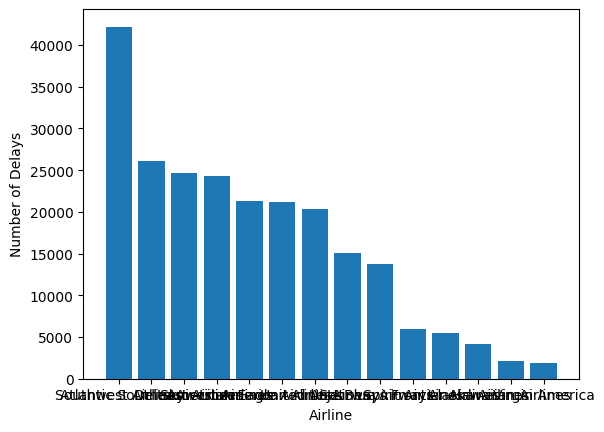

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

airlines = ['Southwest Airlines', 'Atlantic Southeast Airlines', 'Delta Air Lines', 'Skywest Airlines', 'American Eagle Airlines', 'American Airlines','United Air Lines','US Airways','JetBlue Airways','Spirit Air Lines','Frontier Airlines','Alaska Airlines','Hawaiian Airlines','Virgin America']
n_delays = [42195, 26118, 24672, 24342, 21311, 21230, 20323, 15026, 13789, 5902, 5428, 4153, 2103, 1936]

ax.bar(airlines, n_delays)
ax.set_xlabel('Airline')
ax.set_ylabel('Number of Delays')

In [ ]:
df_a1 = pd.read_csv('/content/drive/MyDrive/dsc502/airlines.csv')
df_a1 = df_a1.assign(ARC=range(len(df_a1)))
df_a2 = pd.DataFrame()
df_a2['IATA_CODE'] = df_delayed['AIRLINE']
df_a3 = df_a2.merge(df_a1, on='IATA_CODE')
df_a4 = pd.DataFrame()
df_a4['IATA_CODE'] = df_flights['AIRLINE']
df_a5 = df_a4.merge(df_a1, on='IATA_CODE')
df_a5

,IATA_CODE,AIRLINE,ARC
0,AS,Alaska Airlines Inc.,6
1,AS,Alaska Airlines Inc.,6
2,AS,Alaska Airlines Inc.,6
3,AS,Alaska Airlines Inc.,6
4,AS,Alaska Airlines Inc.,6
...,...,...,...
1048570,VX,Virgin America,13
1048571,VX,Virgin America,13
1048572,VX,Virgin America,13
1048573,VX,Virgin America,13


In [ ]:
df_p1 = df_airports["IATA_CODE"]
#df_p1.reset_index(inplace=True)
# df_p2 = pd.DataFrame()
# df_p3 = pd.DataFrame()
# df_p2['IATA_CODE'] = df_flights['ORIGIN_AIRPORT']
# df_p3['IATA_CODE'] = df_flights['DESTINATION_AIRPORT']
df_p1

0      ABE
1      ABI
2      ABQ
3      ABR
4      ABY
      ... 
317    WRG
318    WYS
319    XNA
320    YAK
321    YUM
Name: IATA_CODE, Length: 319, dtype: object

In [ ]:
df_canceled['CANCELLATION_REASON'].value_counts()

B    28260
A     6974
C     5291
D        2
Name: CANCELLATION_REASON, dtype: int64

# Modeling

KNN Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df_flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3,10,2,EV,RDU,EWR,1013,1005.0,-8.0,96.0,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,3,10,2,UA,LGA,IAH,1013,1005.0,-8.0,264.0,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,3,10,2,UA,SAN,ORD,1013,1010.0,-3.0,251.0,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,3,10,2,EV,MSY,ORD,1013,1003.0,-10.0,149.0,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,SCHEDULED_ARRIVAL,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TOTAL_DELAY
0,2015-01-01,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,430,...,-22.0,0,0,NaN,0,0,0,0,0,0
1,2015-01-01,4,AA,LAX,PBI,10,2.0,-8.0,280.0,750,...,-9.0,0,0,NaN,0,0,0,0,0,0
2,2015-01-01,4,US,SFO,CLT,20,18.0,-2.0,286.0,806,...,5.0,0,0,NaN,0,0,0,0,0,0
3,2015-01-01,4,AA,LAX,MIA,20,15.0,-5.0,285.0,805,...,-9.0,0,0,NaN,0,0,0,0,0,0
4,2015-01-01,4,AS,SEA,ANC,25,24.0,-1.0,235.0,320,...,-21.0,0,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015-03-10,2,EV,RDU,EWR,1013,1005.0,-8.0,96.0,1149,...,-16.0,0,0,NaN,0,0,0,0,0,0
1048571,2015-03-10,2,UA,LGA,IAH,1013,1005.0,-8.0,264.0,1337,...,-2.0,0,0,NaN,0,0,0,0,0,0
1048572,2015-03-10,2,UA,SAN,ORD,1013,1010.0,-3.0,251.0,1624,...,3.0,0,0,NaN,0,0,0,0,0,0
1048573,2015-03-10,2,EV,MSY,ORD,1013,1003.0,-10.0,149.0,1242,...,-13.0,0,0,NaN,0,0,0,0,0,0


In [ ]:
df_f1 = df_flights[['MONTH','DAY','DAY_OF_WEEK','SCHEDULED_DEPARTURE','CANCELLED']]

# Features
X = df_f1.loc[:, :'SCHEDULED_DEPARTURE']

# Label : Cancellation
y = df_f1.loc[:, 'CANCELLED']

# Generate the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
X_train

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE
656253,2,13,5,933
329191,1,22,4,1423
557768,2,6,5,1705
93060,1,6,2,2000
558339,2,6,5,1737
...,...,...,...,...
491263,2,2,1,1310
791624,2,22,7,800
470924,2,1,7,700
491755,2,2,1,1340


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='euclidean')

# "Train" the model
classifier.fit(X_train, y_train)

# Run the model to make predictions based on test set
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = classifier.score(X_test, y_test)
print('Test set accuracy:', accuracy)

[[201111    406]
 [  8086    112]]
Test set accuracy: 0.9595069499082087


KNN Regression

In [ ]:
df_f2 = df_flights.loc[df_flights['CANCELLED'] == 0]
df_f3 = df_f2.loc[df_f2['DIVERTED'] == 0] 
df_f3 = df_f3.fillna(0)
df_f4 = df_f3.loc[:,'AIR_SYSTEM_DELAY':'WEATHER_DELAY']
df_f4['TOTAL_DELAY'] = df_f4.sum(axis=1)
df_f3['TOTAL_DELAY'] = df_f4.loc[:,'TOTAL_DELAY']
df_f5 = df_f3.loc[:,['MONTH','DAY','DAY_OF_WEEK','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','TOTAL_DELAY']]
df_f5


,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_DELAY
0,1,1,4,5,430,0.0,0.0,0.0,0.0,0.0
1,1,1,4,10,750,0.0,0.0,0.0,0.0,0.0
2,1,1,4,20,806,0.0,0.0,0.0,0.0,0.0
3,1,1,4,20,805,0.0,0.0,0.0,0.0,0.0
4,1,1,4,25,320,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048569,3,10,2,1013,1650,0.0,0.0,0.0,19.0,19.0
1048570,3,10,2,1013,1149,0.0,0.0,0.0,0.0,0.0
1048571,3,10,2,1013,1337,0.0,0.0,0.0,0.0,0.0
1048572,3,10,2,1013,1624,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df_f5.loc[:, :'LATE_AIRCRAFT_DELAY']
y = df_f5.loc[:, 'TOTAL_DELAY']

# Generate the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# define the model.  Neighborhood size = 15 (try changing the neighborhood size)
knn = KNeighborsRegressor(n_neighbors = 15, weights = 'uniform')

# "Train" the model
knn.fit(X_train, y_train)

# Run the model
y_pred = knn.predict(X_test)

print('R squared: ', knn.score(X_test, y_test))

R squared:  0.8927492199457895


# K-Means

In [ ]:
df_kcl = df_f5[['MONTH','DAY','TOTAL_DELAY']]
df_kcl['DAY'] = df_kcl['DAY'].apply(lambda x: '{0:0>2}'.format(x))
df_kcl['MONTH']=df_kcl['MONTH'].astype(str)
df_kcl['DAY']=df_kcl['DAY'].astype(str)
df_kcl['MMDD'] = df_kcl[['MONTH', 'DAY']].apply(lambda x: ''.join(x), axis=1)
df_kcl

<ipython-input-55-685f964ad535>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kcl['DAY'] = df_kcl['DAY'].apply(lambda x: '{0:0>2}'.format(x))
<ipython-input-55-685f964ad535>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kcl['MONTH']=df_kcl['MONTH'].astype(str)
<ipython-input-55-685f964ad535>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,MONTH,DAY,TOTAL_DELAY,MMDD
0,1,01,0.0,101
1,1,01,0.0,101
2,1,01,0.0,101
3,1,01,0.0,101
4,1,01,0.0,101
...,...,...,...,...
1048569,3,10,19.0,310
1048570,3,10,0.0,310
1048571,3,10,0.0,310
1048572,3,10,0.0,310


In [ ]:
df_kcl['MMDD']=df_kcl['MMDD'].astype(int)
df_kcl

<ipython-input-56-bcd1dcb91fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kcl['MMDD']=df_kcl['MMDD'].astype(int)


,MONTH,DAY,TOTAL_DELAY,MMDD
0,1,01,0.0,101
1,1,01,0.0,101
2,1,01,0.0,101
3,1,01,0.0,101
4,1,01,0.0,101
...,...,...,...,...
1048569,3,10,19.0,310
1048570,3,10,0.0,310
1048571,3,10,0.0,310
1048572,3,10,0.0,310


In [ ]:
from sklearn.cluster import KMeans

X = df_kcl.loc[:, ['MMDD','TOTAL_DELAY']].values

In [ ]:
wcss = []
for k in range(5,21): 
     kmeans = KMeans(n_clusters = k, random_state = 0, n_init=10)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
wcss

[683096406.1877556,
 516088641.5703105,
 423012141.2138839,
 358853174.9355533,
 301923236.2648284,
 255177364.7704625,
 225284861.47420186,
 198162746.672321,
 177233516.81841552,
 160486734.67965662,
 144291715.9459554,
 129627485.6472657,
 115847166.16783056,
 107039283.95246288,
 98280070.89687589,
 90635445.70891115]

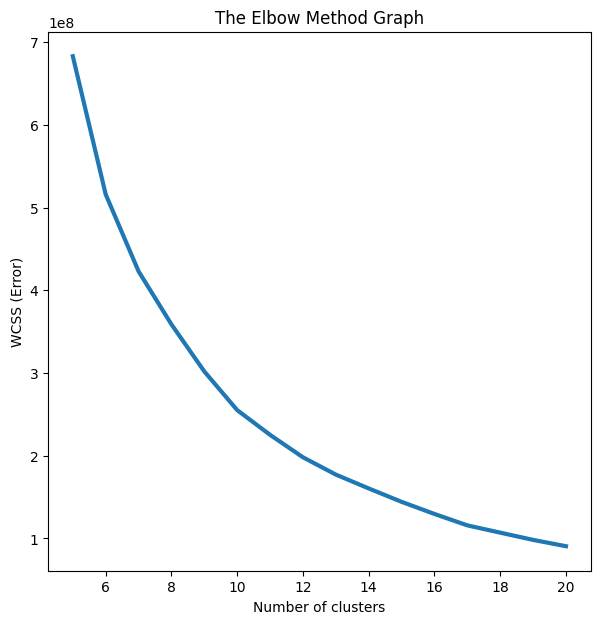

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(5,21), wcss, linewidth = 3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

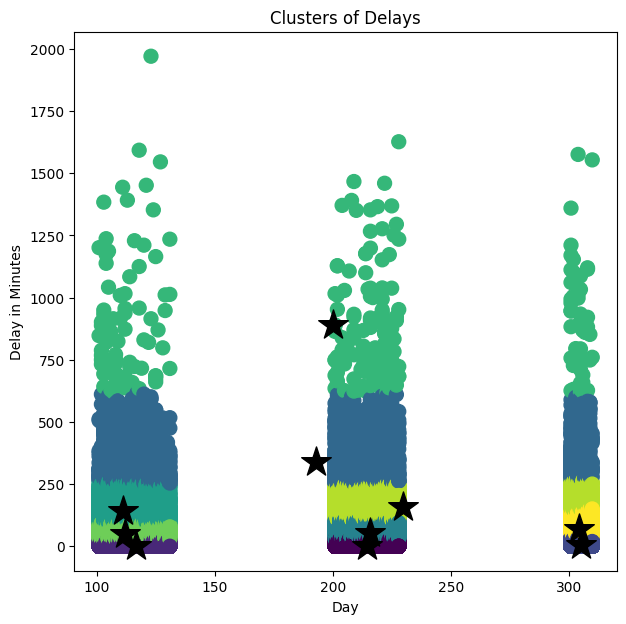

In [ ]:
kmeans = KMeans(n_clusters=10, init ='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title('Clusters of Delays')
plt.xlabel('Day')
plt.ylabel('Delay in Minutes')
plt.show()

# Other

K-Means clustering

In [ ]:
from sklearn.cluster import KMeans

X = df_f5.loc[:, ['SCHEDULED_DEPARTURE','TOTAL_DELAY']].values

array([[   5.,    0.],
       [  10.,    0.],
       [  20.,    0.],
       ...,
       [1013.,    0.],
       [1013.,    0.],
       [1013.,    0.]])

In [ ]:
wcss = []
for k in range(5,21): 
     kmeans = KMeans(n_clusters = k, random_state = 0, n_init=10)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
wcss

[12534065105.568693,
 9426927753.621143,
 7686099657.246519,
 6197115349.684077,
 5150811745.244431,
 4391978952.243985,
 3992624128.1606274,
 3616960605.423999,
 3287050846.3154144,
 2993778064.3341107,
 2718538800.440483,
 2452479847.999015,
 2279564647.5743504,
 1959532514.1719475,
 1783949131.1084042,
 1613394318.2824998]

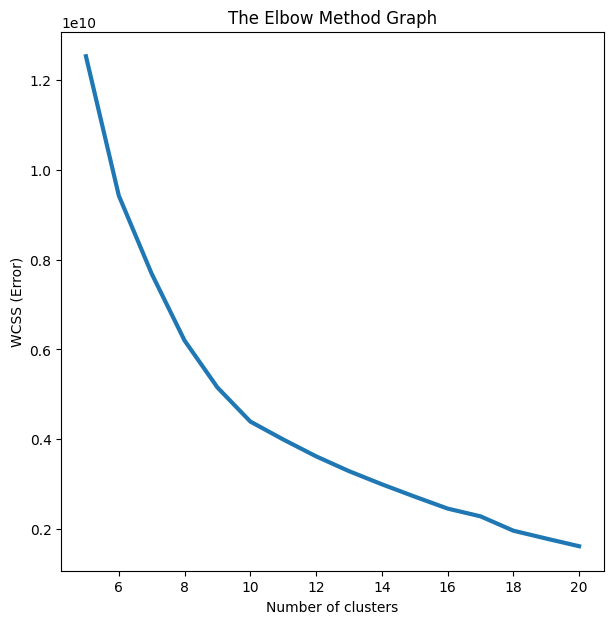

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(5,21), wcss, linewidth = 3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

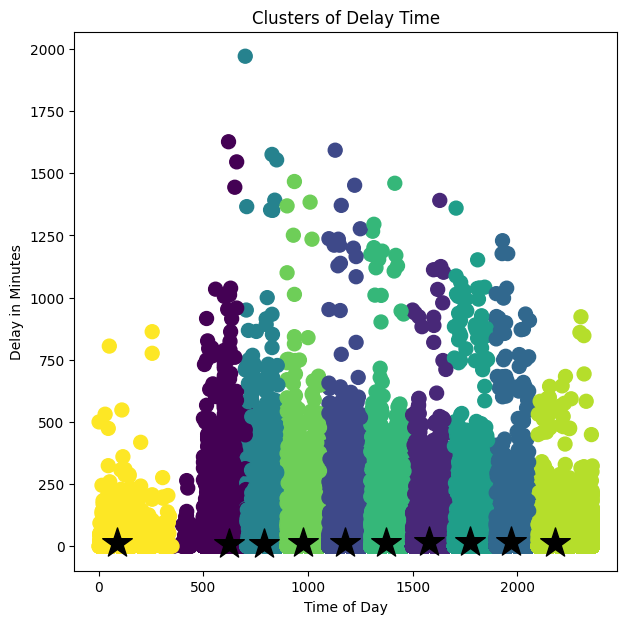

In [ ]:
kmeans = KMeans(n_clusters=10, init ='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title('Clusters of Delay Time')
plt.xlabel('Time of Day')
plt.ylabel('Delay in Minutes')
plt.show()